In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('day.csv')

In [2]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data.drop(labels=['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','atemp','hum','windspeed','casual','registered'],axis=1,inplace=True)

In [5]:
data.isnull().sum()

temp    0
cnt     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,temp,cnt
count,731.000000,731.000000
mean,0.495385,4504.348837
std,0.183051,1937.211452
min,0.059130,22.000000
25%,0.337083,3152.000000
50%,0.498333,4548.000000
75%,0.655417,5956.000000
max,0.861667,8714.000000


In [8]:
data.corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


<AxesSubplot:>

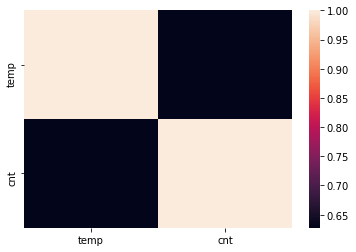

In [9]:
sns.heatmap(data.corr())

In [10]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

1214.6421190294022
[6640.70999855]


In [13]:
y_pred=lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

-0.5349758532745796
